In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dias01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
df_train = pd.read_csv('original_set/train.csv', na_values=[' ?'])
df_test = pd.read_csv('original_set/test.csv')
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [36]:
df_train['comment_text'].fillna(' ')
df_test['comment_text'].fillna(' ')
df_train.shape

(159571, 8)

In [37]:
df_test.head(20)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [38]:
df_test.shape

(153164, 2)

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [40]:
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [41]:
lis = []
for i in df_train.comment_text:
    lis.append(len(i))
lis.sort(reverse=True)
lis[-1]

6

In [42]:
df_train.describe(include = 'all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


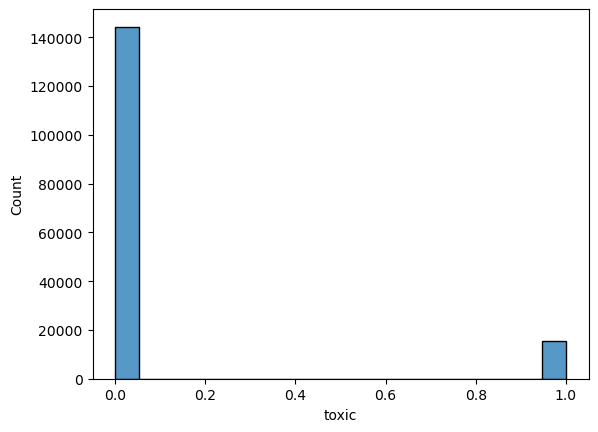

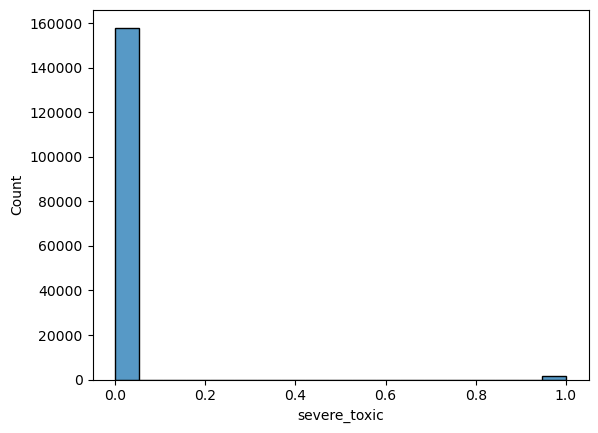

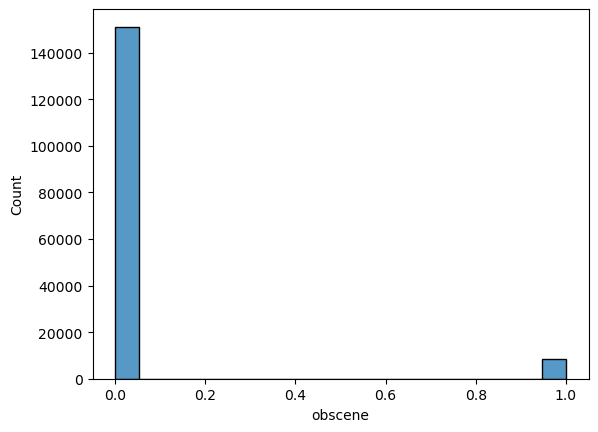

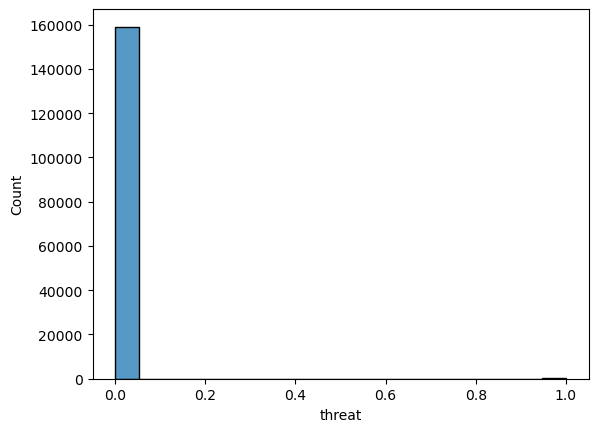

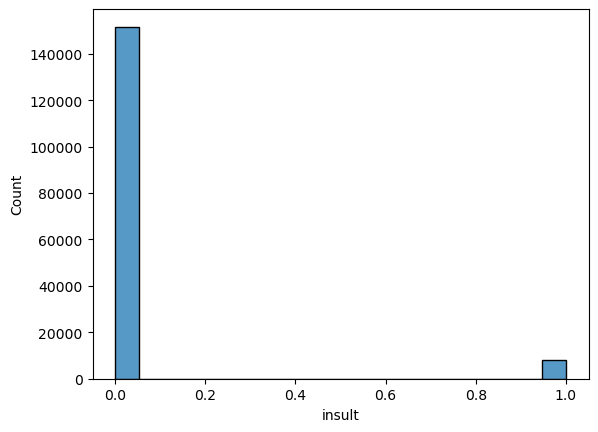

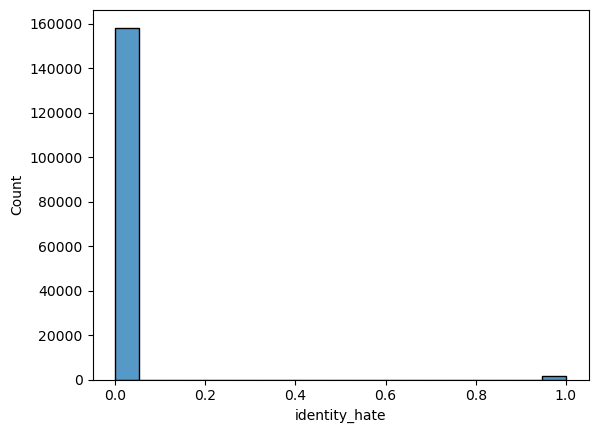

In [43]:
df1 = df_train.drop(['id', 'comment_text'], axis=1)
for i in df1.columns:
    j = 1
    plt.figure(j)
    sns.histplot(data=df1, x=i)
    plt.savefig(f'histogram_{i}.png')
    plt.show()
    j = j+1

In [44]:
df2 = df1.sum()
df2

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

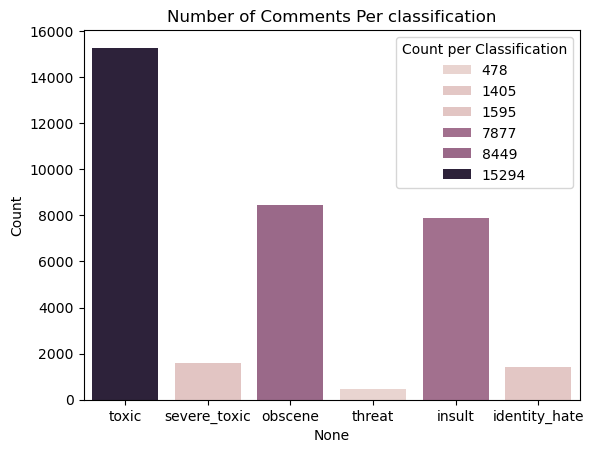

In [45]:
sns.barplot(x=df2.index, y=df2.values, hue=df2.values, dodge=False)
plt.ylabel('Count')
plt.title("Number of Comments Per classification")
leg = plt.legend(title='Count per Classification', bbox_to_anchor=(1,1))
plt.savefig('Number of Comments Per classification', bbox_extra_artists=[leg, ], bbox_inches='tight')

In [46]:
import re
import string

remove_n = lambda x: re.sub(r"\n", "", x)

remove_alpha_num = lambda x: re.sub(r"\w*\d\w*", '', x)

remove_pun = lambda x: re.sub(r"([^\w\s]|_)", '', x.lower())

remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

df_train['comment_text'] = df_train['comment_text'].map(remove_n).map(remove_alpha_num).map(remove_pun).map(remove_non_ascii)
df_test['comment_text'] = df_test['comment_text'].map(remove_n).map(remove_alpha_num).map(remove_pun).map(remove_non_ascii)

In [47]:
for i in range(5):
    print(df_train['comment_text'][i])
    print("\n")

explanationwhy the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired now


daww he matches this background colour im seemingly stuck with thanks  talk  january   utc


hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info


morei cant make any real suggestions on improvement  i wondered if the section statistics should be later on or a subsection of types of accidents  i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first  if you have any preferences for formatting style on references or want to do it yourself please let me knowthere appears to be a

In [48]:
for i in range(5):
    print(df_test['comment_text'][i])
    print("\n")

yo bitch ja rule is more succesful then youll ever be whats up with you and hating you sad mofuckasi should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother toofuckin white boys get things right next time


 from rfc   the title is fine as it is imo


   sources    zawe ashton on lapland     


if you have a look back at the source the information i updated was the correct form i can only guess the source hadnt updated i shall update the information once again but thank you for your message


i dont anonymously edit articles at all




In [49]:
df_toxic = df_train[['id', 'comment_text', 'toxic']]
df_severe_toxic = df_train[['id', 'comment_text', 'severe_toxic']]
df_obscene = df_train[['id', 'comment_text', 'obscene']]
df_threat = df_train[['id', 'comment_text', 'threat']]
df_insult = df_train[['id', 'comment_text', 'insult']]
df_identity_hate = df_train[['id', 'comment_text', 'identity_hate']]

In [50]:
df_toxic_1 = df_toxic[df_toxic['toxic'] == 1]
df_toxic_0 = df_toxic[df_toxic['toxic'] == 0].iloc[:15294]
df_toxic_bal = pd.concat([df_toxic_1, df_toxic_0], axis=0)
df_toxic_bal.shape

(30588, 3)

In [51]:
df_severe_toxic_1 = df_severe_toxic[df_severe_toxic['severe_toxic'] == 1]
df_severe_toxic_0 = df_severe_toxic[df_severe_toxic['severe_toxic'] == 0].iloc[:1595]
df_severe_toxic_bal = pd.concat([df_severe_toxic_1, df_severe_toxic_0], axis=0)
df_severe_toxic_bal.shape

(3190, 3)

In [52]:
df_obscene_1 = df_obscene[df_obscene['obscene'] == 1]
df_obscene_0 = df_obscene[df_obscene['obscene'] == 0].iloc[:8449]
df_obscene_bal = pd.concat([df_obscene_1, df_obscene_0], axis=0)
df_obscene_bal.shape

(16898, 3)

In [53]:
df_threat_1 = df_threat[df_threat['threat'] == 1]
df_threat_0 = df_threat[df_threat['threat'] == 0].iloc[:700]
df_threat_bal = pd.concat([df_threat_1, df_threat_0], axis=0)
df_threat_bal.shape

(1178, 3)

In [54]:
df_insult_1 = df_insult[df_insult['insult'] == 1]
df_insult_0 = df_insult[df_insult['insult'] == 0].iloc[:7877]
df_insult_bal = pd.concat([df_insult_1, df_insult_0], axis=0)
df_insult_bal.shape

(15754, 3)

In [55]:
df_identity_hate_1 = df_identity_hate[df_identity_hate['identity_hate'] == 1]
df_identity_hate_0 = df_identity_hate[df_identity_hate['identity_hate'] == 0].iloc[:1405]
df_identity_hate_bal = pd.concat([df_identity_hate_1, df_identity_hate_0], axis=0)
df_identity_hate_bal.shape

(2810, 3)

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def frequent_words(dataset, category):
    stopwords = STOPWORDS
    wc = WordCloud(
        width=600, height=600, random_state=42,
        background_color='black', colormap='rainbow',
        collocations=False, stopwords=stopwords
    )
    
    filter = dataset[dataset[category] == 1]
    text = filter.comment_text.values
    wc.generate(' '.join(text))
    
    plt.figure(figsize=(8,8))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f'Word Cloud for {category}', fontsize=14, fontweight='bold')
    plt.axis("off")
    plt.savefig(f'wordcloud/Wordcloud {category}.png')
    plt.show()


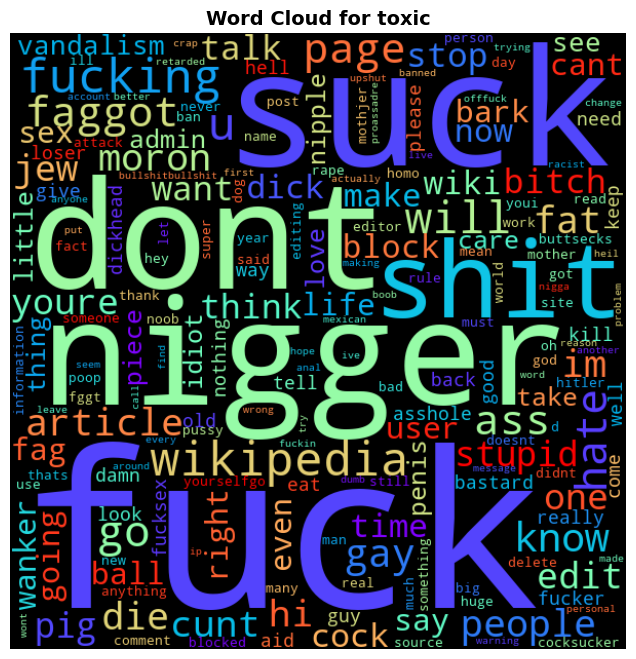

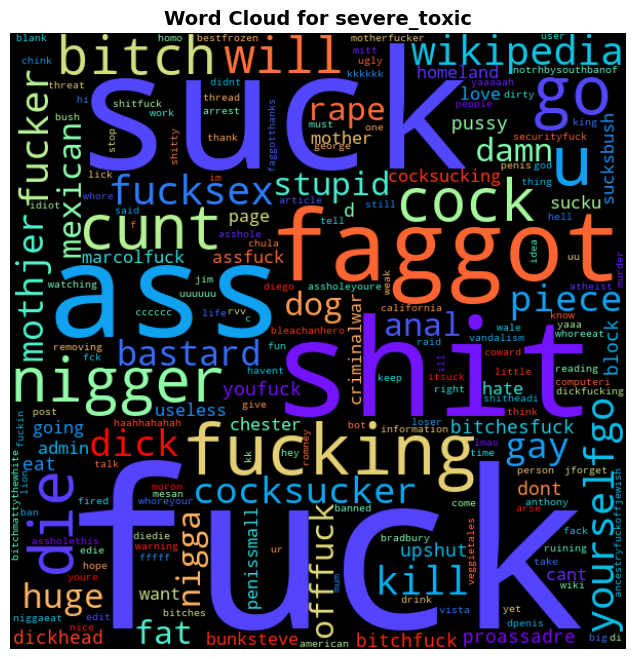

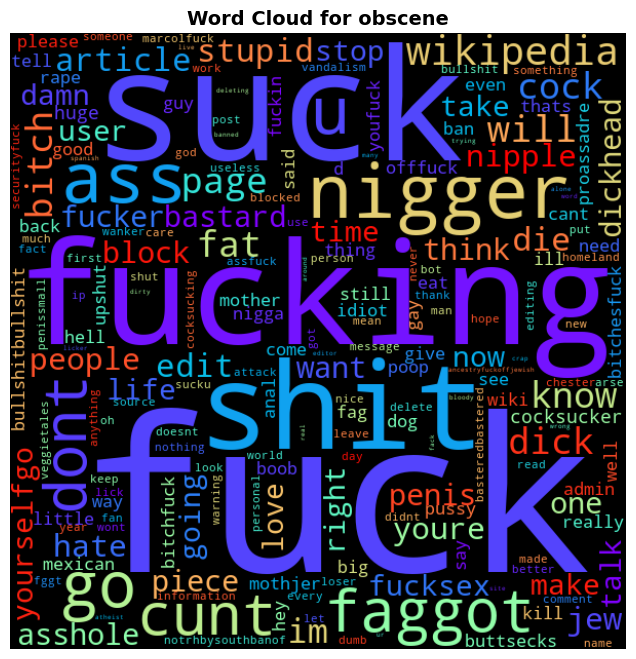

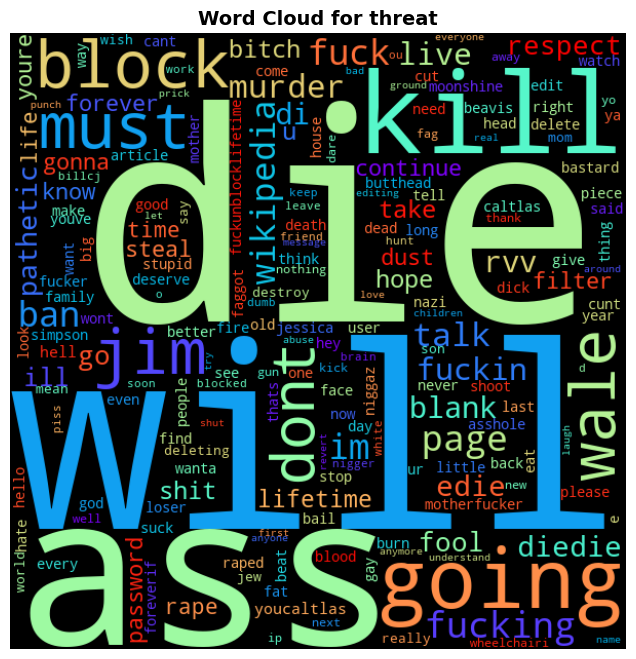

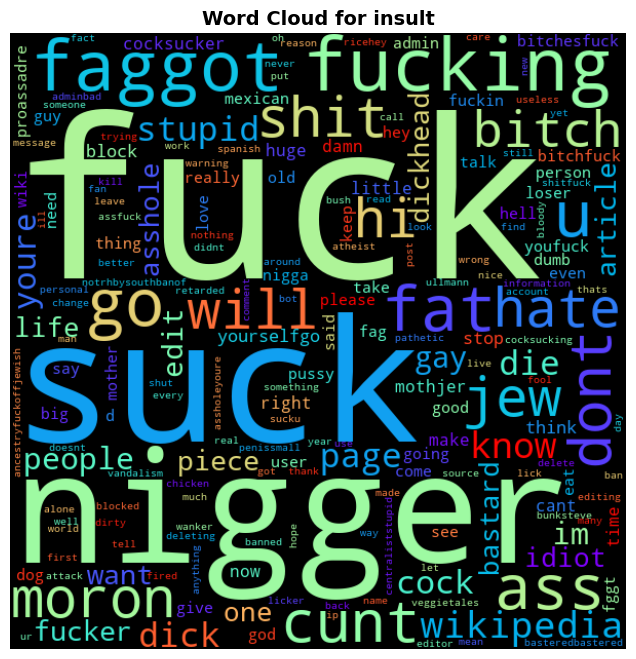

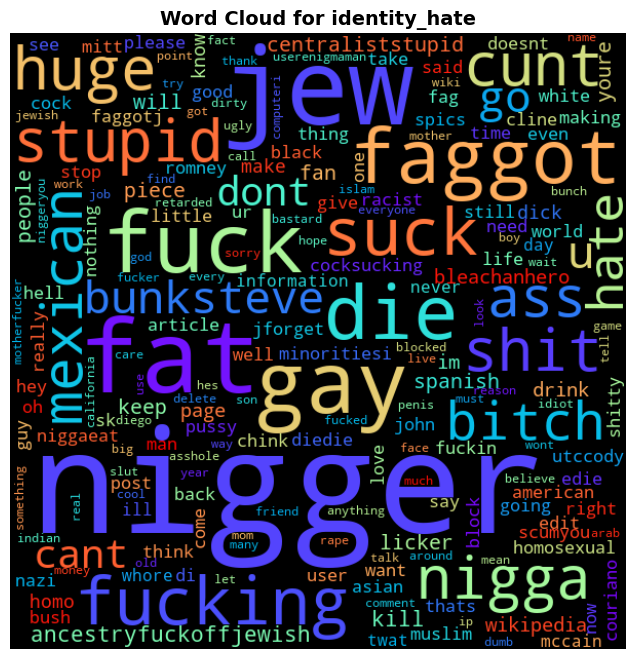

In [57]:
frequent_words(df_toxic_bal, 'toxic')
frequent_words(df_severe_toxic_bal, 'severe_toxic')
frequent_words(df_obscene_bal, 'obscene')
frequent_words(df_threat_bal, 'threat')
frequent_words(df_insult_bal, 'insult')
frequent_words(df_identity_hate_bal, 'identity_hate')

In [58]:
df_toxic_bal.to_csv("newset/Toxic.csv")
df_severe_toxic_bal.to_csv('newset/Severe_toxic.csv')
df_obscene_bal.to_csv('newset/Obscene.csv')
df_threat_bal.to_csv('newset/Threat.csv')
df_insult_bal.to_csv('newset/Insult.csv')
df_identity_hate_bal.to_csv('newset/Identity_hate.csv')